<a href="https://colab.research.google.com/github/svishnupriya1999/Machine-learning-Supervised/blob/main/diabetics_(random_forest_%26_decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Preprocessing___

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We note that minimum value for columns such as Glucose,BP,Insulin,BMI are 0 which is not possible ,hence these must be missing values which are encoded as 0 we can use imputation techniques to deal with these.

In [ ]:
corrupted_data=df.loc[:,'Glucose':'BMI']


In [ ]:
corrupted_data.replace(0,np.nan,inplace=True)

In [ ]:
df.loc[:,'Glucose':'BMI']=corrupted_data

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df.dropna(subset=['Glucose','BMI'],inplace=True) #dropping rows with missing values of glucose and bmi
for i in df:
  df[i].fillna(df[i].mean(),inplace=True) #filling missing values with mean

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#input data
x=df.iloc[:,:-1].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
#output data
y=df.iloc[:,-1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [ ]:
#dimension of x
x.ndim

2

In [ ]:
#dimension of y
y.ndim

1

In [ ]:
#training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[  4.   , 142.   ,  86.   , ...,  44.   ,   0.645,  22.   ],
       [  0.   , 105.   ,  68.   , ...,  20.   ,   0.236,  22.   ],
       [  3.   , 129.   ,  64.   , ...,  26.4  ,   0.219,  28.   ],
       ...,
       [  0.   , 104.   ,  64.   , ...,  27.8  ,   0.454,  23.   ],
       [  1.   , 100.   ,  72.   , ...,  25.3  ,   0.658,  28.   ],
       [  4.   , 144.   ,  58.   , ...,  29.5  ,   0.287,  37.   ]])

In [ ]:
x_test

array([[1.00e+00, 1.73e+02, 7.40e+01, ..., 3.68e+01, 8.80e-02, 3.80e+01],
       [1.00e+00, 1.24e+02, 6.00e+01, ..., 3.58e+01, 5.14e-01, 2.10e+01],
       [7.00e+00, 1.95e+02, 7.00e+01, ..., 2.51e+01, 1.63e-01, 5.50e+01],
       ...,
       [1.00e+00, 9.30e+01, 5.60e+01, ..., 2.25e+01, 4.17e-01, 2.20e+01],
       [3.00e+00, 1.22e+02, 7.80e+01, ..., 2.30e+01, 2.54e-01, 4.00e+01],
       [1.00e+00, 1.06e+02, 7.60e+01, ..., 3.75e+01, 1.97e-01, 2.60e+01]])

In [ ]:
y_train

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,

In [ ]:
y_test

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0])

In [ ]:
#normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[ 0.07538906,  0.64491033,  1.17230879, ...,  1.63763166,
         0.51234426, -0.95565039],
       [-1.13543976, -0.55455878, -0.37129502, ..., -1.79080318,
        -0.74848174, -0.95565039],
       [-0.22731815,  0.22347523, -0.71431808, ..., -0.87655389,
        -0.80088771, -0.44985924],
       ...,
       [-1.13543976, -0.58697687, -0.71431808, ..., -0.67656186,
        -0.07645223, -0.87135187],
       [-0.83273256, -0.7166492 , -0.02827195, ..., -1.03369049,
         0.55241941, -0.44985924],
       [ 0.07538906,  0.70974649, -1.22885268, ..., -0.43371439,
        -0.59126383,  0.30882749]])

In [ ]:
x_test

array([[-0.87659919,  1.71768318,  0.10881828, ...,  0.67280225,
        -1.08684817,  0.41910507],
       [-0.87659919,  0.08155523, -0.95319639, ...,  0.52444308,
         0.15887959, -1.08294875],
       [ 0.82880756,  2.45227124, -0.19461448, ..., -1.06299998,
        -0.8675299 ,  1.9211589 ],
       ...,
       [-0.87659919, -0.95354612, -1.25662916, ..., -1.44873381,
        -0.12477204, -0.99459264],
       [-0.30813028,  0.0147745 ,  0.41225105, ..., -1.37455423,
        -0.60142374,  0.59581729],
       [-0.87659919, -0.51947136,  0.26053467, ...,  0.77665366,
        -0.76810562, -0.64116821]])

MODEL CREATION---

In [ ]:
#model creation
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
score=accuracy_score(y_test,y_pred)
score

0.6504424778761062

In [ ]:
result=confusion_matrix(y_test,y_pred)
result

array([[105,  38],
       [ 41,  42]])

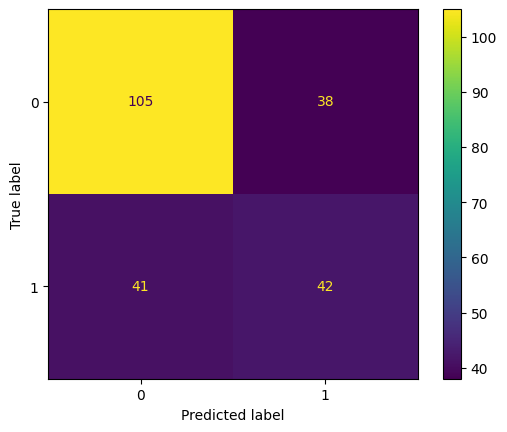

In [ ]:
cmd=ConfusionMatrixDisplay(result)
cmd.plot()

In [ ]:
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.72      0.73      0.73       143\n           1       0.53      0.51      0.52        83\n\n    accuracy                           0.65       226\n   macro avg       0.62      0.62      0.62       226\nweighted avg       0.65      0.65      0.65       226\n'

[Text(0.39366883116883117, 0.9666666666666667, 'Glucose <= 0.175\nentropy = 0.929\nsamples = 526\nvalue = [345, 181]\nclass = 0'),
 Text(0.10876623376623376, 0.9, 'BMI <= -0.869\nentropy = 0.693\nsamples = 328\nvalue = [267, 61]\nclass = 0'),
 Text(0.05194805194805195, 0.8333333333333334, 'Insulin <= -1.212\nentropy = 0.093\nsamples = 84\nvalue = [83, 1]\nclass = 0'),
 Text(0.03896103896103896, 0.7666666666666667, 'SkinThickness <= -1.375\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = 0'),
 Text(0.025974025974025976, 0.7, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.05194805194805195, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'),
 Text(0.06493506493506493, 0.7666666666666667, 'entropy = 0.0\nsamples = 79\nvalue = [79, 0]\nclass = 0'),
 Text(0.16558441558441558, 0.8333333333333334, 'Glucose <= -1.057\nentropy = 0.805\nsamples = 244\nvalue = [184, 60]\nclass = 0'),
 Text(0.09090909090909091, 0.7666666666666667, 'DiabetesPedigreeFunction <= 2.

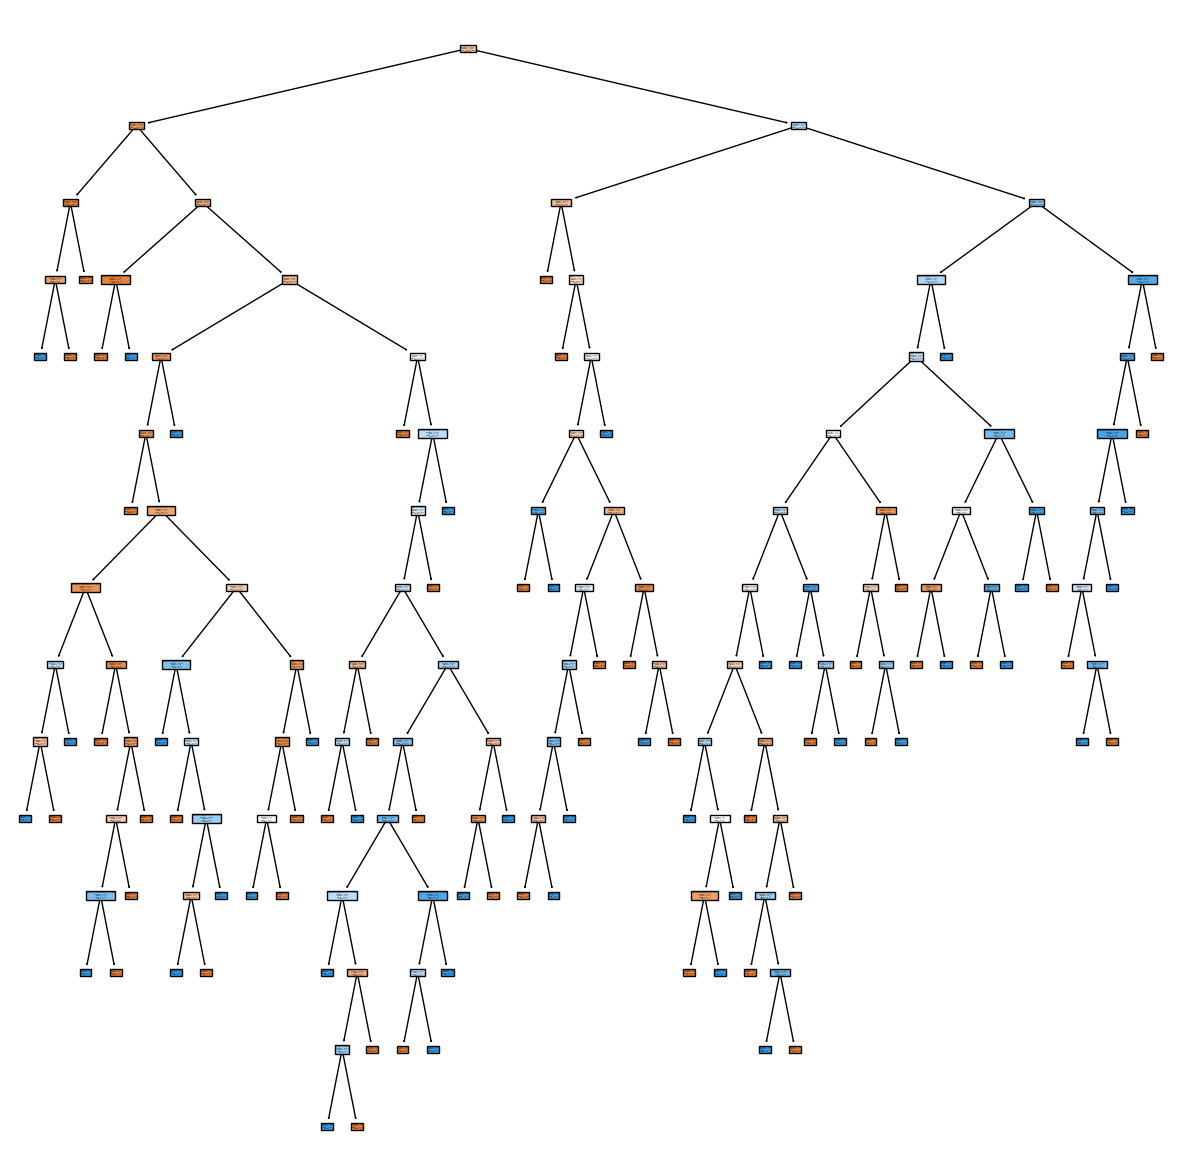

In [ ]:
#to construct tree
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age'],class_names=['0','1'],filled=True)

In [ ]:
#Random forest model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,random_state=42)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.7522123893805309